### Developer Student Club (DSC) - Beginner Machine Learning Track 

### Classification
Is a problem of **identifying which categories an observation belongs to** based on the training data.

Examples of Classification include:
* Detect *Spam* and *Non-Span* Email
* Detect cancer or not

### Logistic Regression
* Is a **binary classifier**
* Examines the **linear relationship between features and label**. 
* Uses [Sigmoid Function](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) to compute the probability for which categories an observation belongs to.
* Output of Logistic Regression: **0.9 that 90% the email is spam**
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

### Logistic Regression for identifying Iris flower types. 
### [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The **use of multiple measurements** in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to **quantify the morphologic variation of Iris flowers of three related species**. 
* The data set consists of **50 samples from each of three species** of Iris (Iris Setosa, Iris virginica, and Iris versicolor). **Four features** were measured from each sample: **the length and the width of the sepals and petals,** in centimeters.

![alt text](https://miro.medium.com/max/2006/1*8BQGOzI2cgNZxiqnjZPfMg.jpeg)

#### **Goal:** identify which specifici species of Iris the flower observation falls under

### Import dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

### Load data

In [ ]:
#load iris data
iris = load_iris()
data = iris.data
labels = iris.target

#### Create DataFrame object to store data

In [ ]:
df = pd.DataFrame(data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species_id'] = labels

#### Inspect first 5 rows of Iris dataset

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


#### Inspect statistics of Iris dataset

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Check missing values

In [ ]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species_id      False
species_name    False
dtype: bool

#### Check Iris flower types (our labels)

In [ ]:
print(df['species_name'].unique())

['sentosa' 'versicolor' 'virginica']


#### Label Encoding

In [ ]:
#label encoding
species_map = {0 : 'sentosa', 1 : 'versicolor', 2 : 'virginica'}
df['species_name'] = df['species_id'].map(species_map)

### Explanatory Data Analysis (EDA) by visualization tools

#### Inspecting the balance of labels

<function matplotlib.pyplot.show>

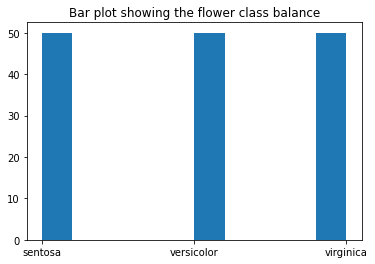

In [ ]:
plt.hist(df['species_name'])
plt.title('Bar plot showing the flower class balance')
plt.show

#### Inspecting width and length of **Septal** feature

<function matplotlib.pyplot.show>

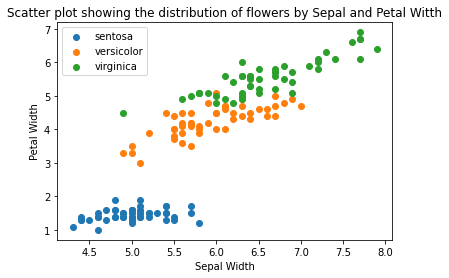

In [ ]:
# By length
plt.scatter(df[df['species_id'] == 0]['sepal_length'], df[df['species_id'] == 0]['petal_length'], label = 'sentosa')
plt.scatter(df[df['species_id'] == 1]['sepal_length'], df[df['species_id'] == 1]['petal_length'], label = 'versicolor')
plt.scatter(df[df['species_id'] == 2]['sepal_length'], df[df['species_id'] == 2]['petal_length'], label = 'virginica')
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter plot showing the distribution of flowers by Sepal and Petal Witth')
plt.show

<function matplotlib.pyplot.show>

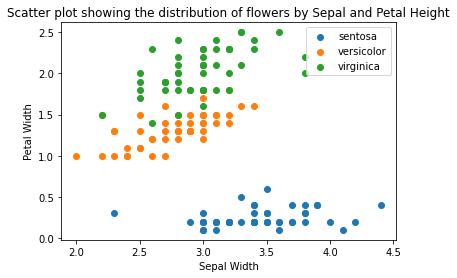

In [ ]:
# By width
plt.scatter(df[df['species_id'] == 0]['sepal_width'], df[df['species_id'] == 0]['petal_width'], label = 'sentosa')
plt.scatter(df[df['species_id'] == 1]['sepal_width'], df[df['species_id'] == 1]['petal_width'], label = 'versicolor')
plt.scatter(df[df['species_id'] == 2]['sepal_width'], df[df['species_id'] == 2]['petal_width'], label = 'virginica')
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Scatter plot showing the distribution of flowers by Sepal and Petal Height')
plt.show

### Build and Train **Logistic Regression** model

#### Split dataset into Train and Test subsets: *80% for training and 20% for testing*

In [ ]:
from sklearn.model_selection import train_test_split
features = df.drop(['species_id', 'species_name'], axis = "columns") #drop columns
labels = df['species_id']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 100)

#### Initialize Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
#create an instance of LogisticRegression model with: iteration_num = 100 and verbose = 1
logit_model = LogisticRegression(max_iter = 100, verbose = 1)

#### Train **Logisitc Regression** model

In [ ]:
logit_model.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

[More details of Scikit-Learn and algorithms are available here](https://github.com/DSC-UTDallas/explore-ml/blob/beginner/resources/scikitlearn.ipynb)

#### Making predictions

In [ ]:
train_preds = logit_model.predict(train_features)

##### Build Confusion Matrix to measure the classification accuracy

Accuracy score: 
0.975


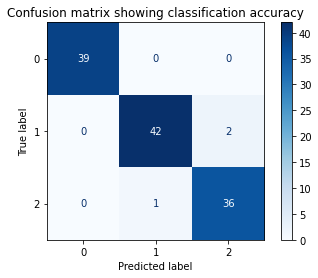

In [ ]:
#test accuracy
train_confusion_matrix = confusion_matrix(train_preds, train_labels)
train_accuracy_score = accuracy_score(train_preds, train_labels)
train_disp = plot_confusion_matrix(logit_model, train_features, train_labels, cmap = plt.cm.Blues)
plt.title('Confusion matrix showing classification accuracy')
print("Accuracy score: ")
print(train_accuracy_score)

###### Visualizing Logistic Regression's train performance

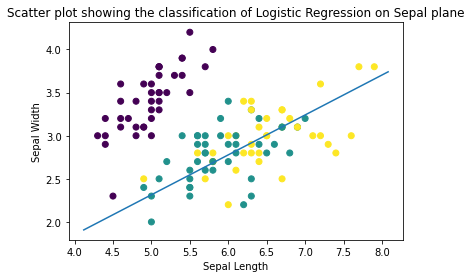

In [ ]:
plt.scatter(train_features['sepal_length'], train_features['sepal_width'], c = train_labels)
ax = plt.gca()
ax.autoscale = False
#get coefficeints and intercepts
xvals = np.array(ax.get_xlim())
train_W, train_b = logit_model.coef_, logit_model.intercept_
yvals = -(xvals * train_W[0][0]) / train_W[0][1]
plt.plot(xvals, yvals)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot showing the classification of Logistic Regression on Sepal plane')
plt.show()

### Training steps

#### **1. Linear Formula**
### **y = w*x + b** that 
* **x, y** are input and output
* **w, b** are weight and bias that are initialized randomly.

In [ ]:
# define inputs
inputs = np.array([0, 1, 2, 3])

# define weight and bias
weight = 0.8
bias = 0.4

# Linear formula outputs
predictions = weight * inputs + bias
predictions

array([0.4, 1.2, 2. , 2.8])

#### 2. Sigmoid Function
- Substitue Linear Formlua into X of Sigmoid Function
### => Logistic Regression y^ = 1 / (1 + e^(-w*x - b))
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

In [ ]:
predictions = 1 / (1 + np.exp(-predictions))
predictions

array([0.59868766, 0.76852478, 0.88079708, 0.94267582])

##### 3. Cost (Loss) functions: Cross Entropy (aka Log Loss)
![alt text](https://miro.medium.com/max/1122/1*KY8QcvVOz1sdUnVKKhxWyA@2x.png)


In [ ]:
labels = np.array([0, 1, 1, 0])

In [ ]:
loss = np.dot(labels, np.log(predictions)) * -1 / 4
loss

0.09755261959525091

#### 4. Optimization

##### -- Gradient Descent
**Gradient Descent**, weight :
* is updated for **every iteration through the training dataset**
* is updated until loss reaches **global minium**

![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png) 

##### -- Update weight
With calculated loss, update weight:\
==> **new_weight = old_weight - d-loss**

that **d-loss** is **the magnitude of weight update** or **derivate of loss w.r.t old_weight**

In [ ]:
weight -= loss #notice: this is for demo. This formula is truly correct in reality
weight

0.7024473804047491

##### Making **Test** predictions

In [ ]:
test_preds = logit_model.predict(test_features)
test_pred_probabilities = logit_model.predict_proba(test_features)

Accuracy score: 
0.9666666666666667


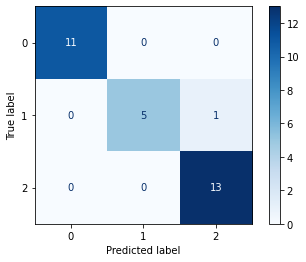

In [ ]:
#test accuracy
test_confusion_matrix = confusion_matrix(test_preds, test_labels)
test_accuracy_score = accuracy_score(test_preds, test_labels)
test_disp = plot_confusion_matrix(logit_model, test_features, test_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(test_accuracy_score)

###### Visualizing Logisitc Regression's Test performance

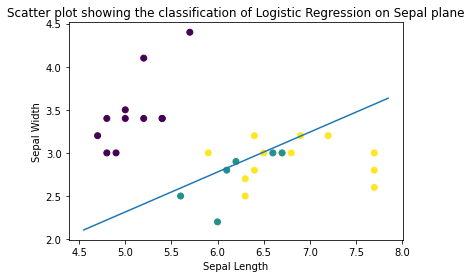

In [ ]:
plt.scatter(test_features['sepal_length'], test_features['sepal_width'], c = test_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
test_W, test_b = logit_model.coef_, logit_model.intercept_
yvals = -(xvals * test_W[0][0]) / test_W[0][1]
plt.plot(xvals, yvals)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot showing the classification of Logistic Regression on Sepal plane')
plt.show()

### Some thoughts
* **Does accuracy score look good?** 
=> Yes
* **Does the model work that well in reality?** 
=> Yes, but not really. The dataset is too small (150 records) to conclude the model's performance
* **How to improve?**
=> Support Vector Machine (SVM) or Decision tree\
[More details of Scikit-Learn and algorithms are available here](https://github.com/DSC-UTDallas/explore-ml/blob/beginner/resources/scikitlearn.ipynb)

#### Overfitting & Underfitting
---
**Overfitting** If the model does really great on the training data but poorly on the testing data, this means you may have overfitted.
  * **Reasons** : 
      * Mostly due to the limited dataset that the model cannot be trained to be generalized.
      * In this notebook, due to the limited Iris dataset, the logistic model in this notebook may easily encouter **overfitting** when it makes predictions against unseen data.
  * **Solutions** : 
      * Simplify ML algorithms/models
      * Add regularization

**Underfitting** is when your model does not capture all the detail of the data while overfitting is when your model captures too much detail and ends up showcasing random noise as well.
  * **Reason** : happen due to 
      * The simplicity of Machine Learning algorithms
      * Too few data features. 
  * **Solutions** : 
      * Build more complex ML algorithms/models
      * Add model parameters and data features.

  ![Overfitting & Underfitting](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

**References**
* Logistic Regression in Sci-Kit Learn, https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6
* Sigmoid Function, https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf